# Exploratory Data Analysis

## Introduction

### Data Description
* The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines.
* The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. 
* The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points.
* The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate.

### Objective
1. To perform Univariate Analysis for:
    * Finding the outliers in each numerical column
    * Understanding the probability and frequency distribution of each numerical column
    * Understanding the frequency distribution of each categorical Variable/Column
2. To perform Bivariate Analysis for:
    * Discovering the relationships between numerical columns using Scatter plots, hexbin plots, pair plots, etc..
    * Identifying the patterns between categorical and numerical columns using swarmplot, boxplot, barplot, etc..
3. Test the claim: \
Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.”
4. To find is there a relationship between gender and specialisation?
5. Perform feature transformation

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx")
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [3]:
df.shape

(3998, 39)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
Unnamed: 0               3998 non-null object
ID                       3998 non-null int64
Salary                   3998 non-null int64
DOJ                      3998 non-null datetime64[ns]
DOL                      3998 non-null object
Designation              3998 non-null object
JobCity                  3998 non-null object
Gender                   3998 non-null object
DOB                      3998 non-null datetime64[ns]
10percentage             3998 non-null float64
10board                  3998 non-null object
12graduation             3998 non-null int64
12percentage             3998 non-null float64
12board                  3998 non-null object
CollegeID                3998 non-null int64
CollegeTier              3998 non-null int64
Degree                   3998 non-null object
Specialization           3998 non-null object
collegeGPA               3998 non-null float64
Colle

In [5]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [6]:
df["Designation"].value_counts()

software engineer                         539
software developer                        265
system engineer                           205
programmer analyst                        139
systems engineer                          118
java software engineer                    111
software test engineer                    100
project engineer                           77
technical support engineer                 76
senior software engineer                   72
java developer                             67
test engineer                              57
web developer                              54
application developer                      52
assistant manager                          52
network engineer                           51
business analyst                           49
data analyst                               49
engineer                                   47
associate software engineer                46
android developer                          46
programmer                        

In [7]:
df["Gender"].value_counts()

m    3041
f     957
Name: Gender, dtype: int64

In [8]:
df["GraduationYear"].value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
2007       1
0          1
Name: GraduationYear, dtype: int64

In [9]:
df.drop(labels='ID',axis =1 ,inplace = True)

In [10]:
df['DOJ']=pd.to_datetime(df['DOJ'])

In [11]:
df['DOL'].value_counts()

present                1875
2015-04-01 00:00:00     573
2015-03-01 00:00:00     124
2015-05-01 00:00:00     112
2015-01-01 00:00:00      99
2014-04-01 00:00:00      82
2015-02-01 00:00:00      69
2014-06-01 00:00:00      67
2014-09-01 00:00:00      64
2014-08-01 00:00:00      63
2014-12-01 00:00:00      53
2014-07-01 00:00:00      52
2014-05-01 00:00:00      52
2014-02-01 00:00:00      49
2014-01-01 00:00:00      46
2014-10-01 00:00:00      44
2014-03-01 00:00:00      39
2014-11-01 00:00:00      35
2013-07-01 00:00:00      31
2013-05-01 00:00:00      29
2015-06-01 00:00:00      26
2015-07-01 00:00:00      26
2013-12-01 00:00:00      25
2013-08-01 00:00:00      24
2013-09-01 00:00:00      23
2013-02-01 00:00:00      21
2013-01-01 00:00:00      20
2013-03-01 00:00:00      18
2013-10-01 00:00:00      18
2013-06-01 00:00:00      17
                       ... 
2012-01-01 00:00:00      10
2012-12-01 00:00:00       9
2012-11-01 00:00:00       9
2015-08-01 00:00:00       8
2012-10-01 00:00:00 

## Univariate Analysis

In [12]:
df.hist(figsize=(300,300))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001940AC95518>,
      dtype=object)

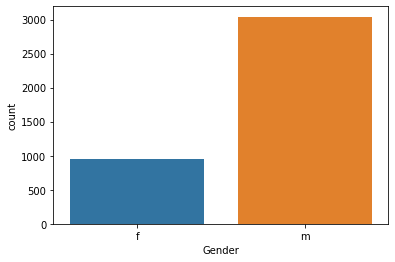

In [13]:
sns.countplot(df['Gender'])

Most of the employees are Male

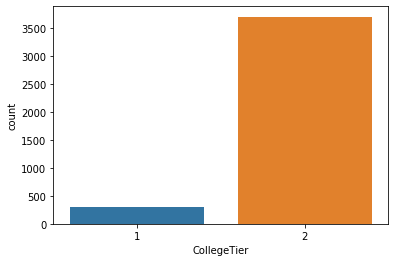

In [14]:
sns.countplot(df["CollegeTier"])

Very few employees from Tier 1 college

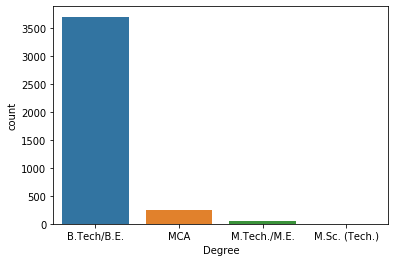

In [15]:
sns.countplot(df["Degree"])

Most of the employees are B.E./B.Tech graduates

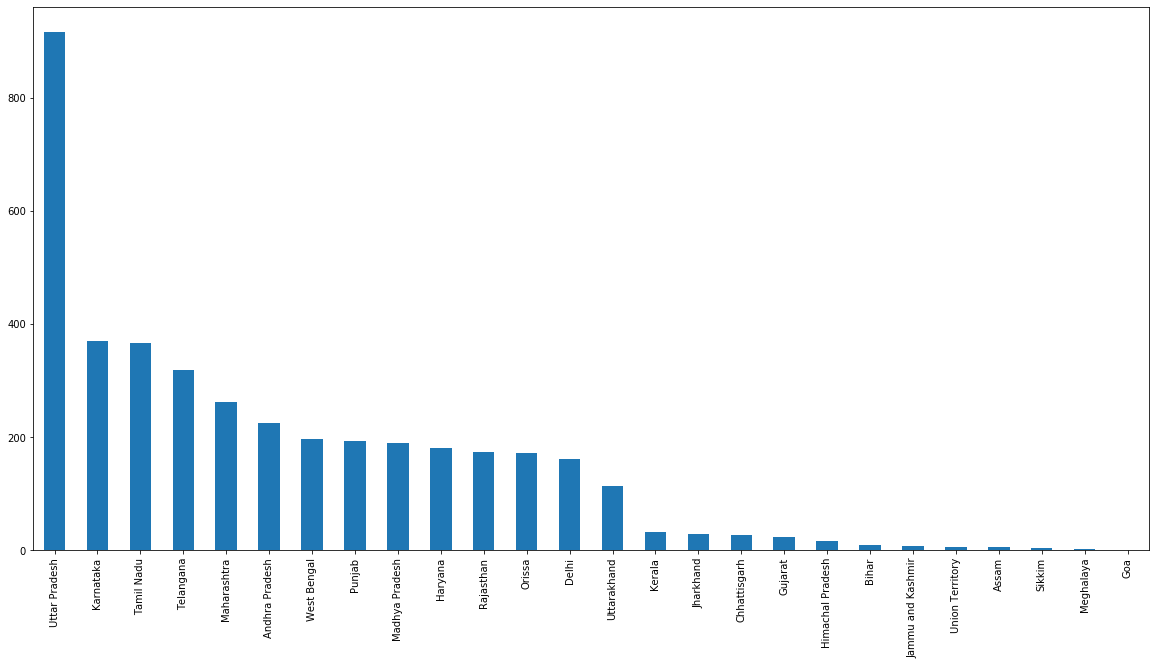

In [16]:
state = df["CollegeState"].value_counts()
state.plot(kind="bar",figsize=(20,10))

More employees from Uttar Pradesh

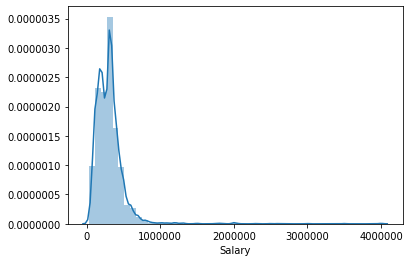

In [17]:
sns.distplot(df["Salary"])

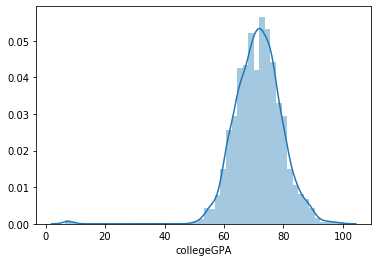

In [18]:
sns.distplot(df.collegeGPA )

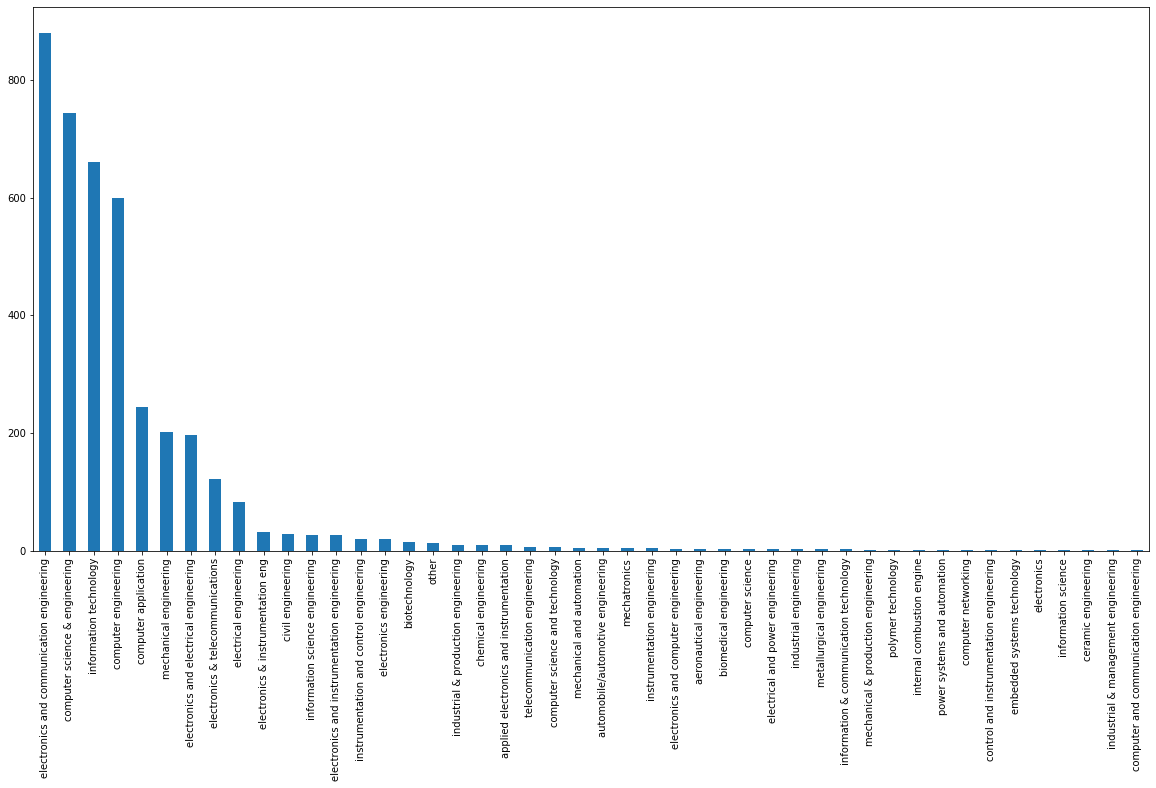

In [19]:
spec = df['Specialization'].value_counts()
spec.plot(kind="bar",figsize=(20,10))

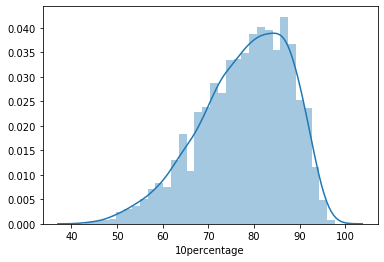

In [20]:
sns.distplot(df["10percentage"])

10percentage column is Right skewed

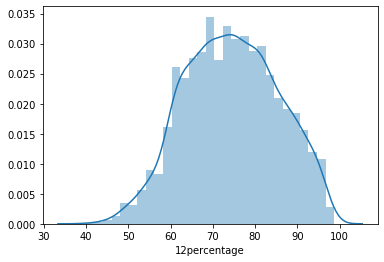

In [21]:
sns.distplot(df["12percentage"])

12percentage is not normally distributed

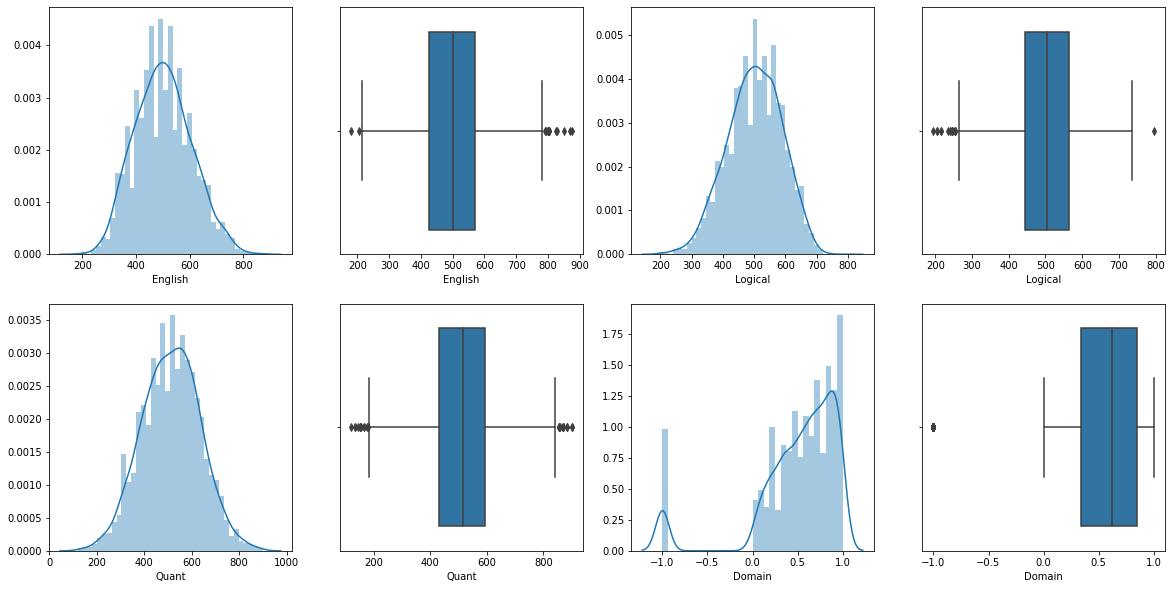

In [22]:
plt.figure(figsize=(20,10))
plt.subplot(241)
sns.distplot(df['English'])
plt.subplot(242)
sns.boxplot(df['English'])
plt.subplot(243)
sns.distplot(df['Logical'])
plt.subplot(244)
sns.boxplot(df['Logical'])
plt.subplot(245)
sns.distplot(df['Quant'])
plt.subplot(246)
sns.boxplot(df['Quant'])
plt.subplot(247)
sns.distplot(df['Domain'])
plt.subplot(248)
sns.boxplot(df['Domain'])
plt.show()

These are the distribution of AMCAT score of soft skills

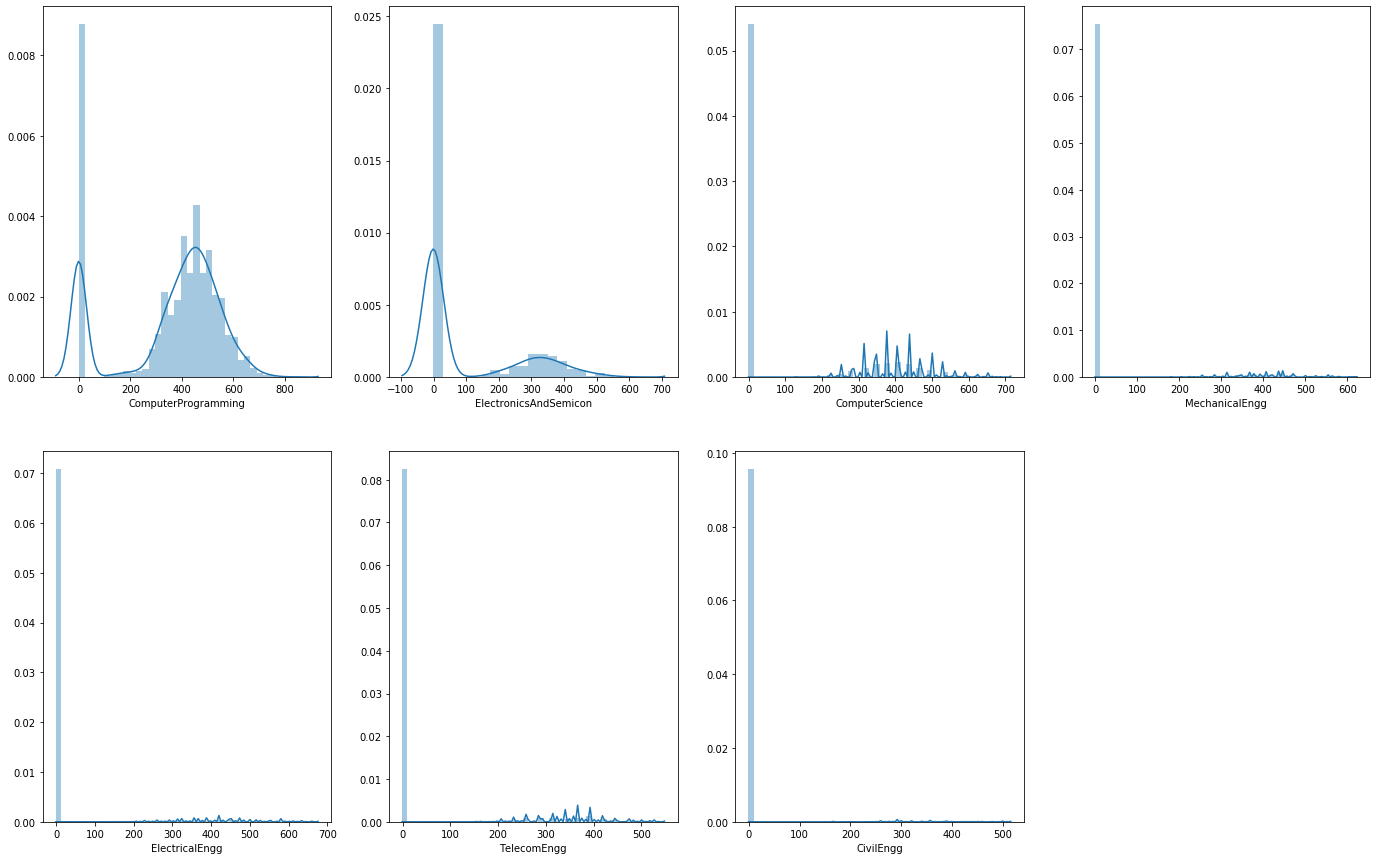

In [23]:
plt.figure(figsize=(30,15))
plt.subplot(251)
sns.distplot(df['ComputerProgramming'])
plt.subplot(252)
sns.distplot(df['ElectronicsAndSemicon'])
plt.subplot(253)
sns.distplot(df['ComputerScience'])
plt.subplot(254)
sns.distplot(df['MechanicalEngg'])
plt.subplot(256)
sns.distplot(df['ElectricalEngg'])
plt.subplot(257)
sns.distplot(df['TelecomEngg'])
plt.subplot(258)
sns.distplot(df['CivilEngg'])
plt.show()

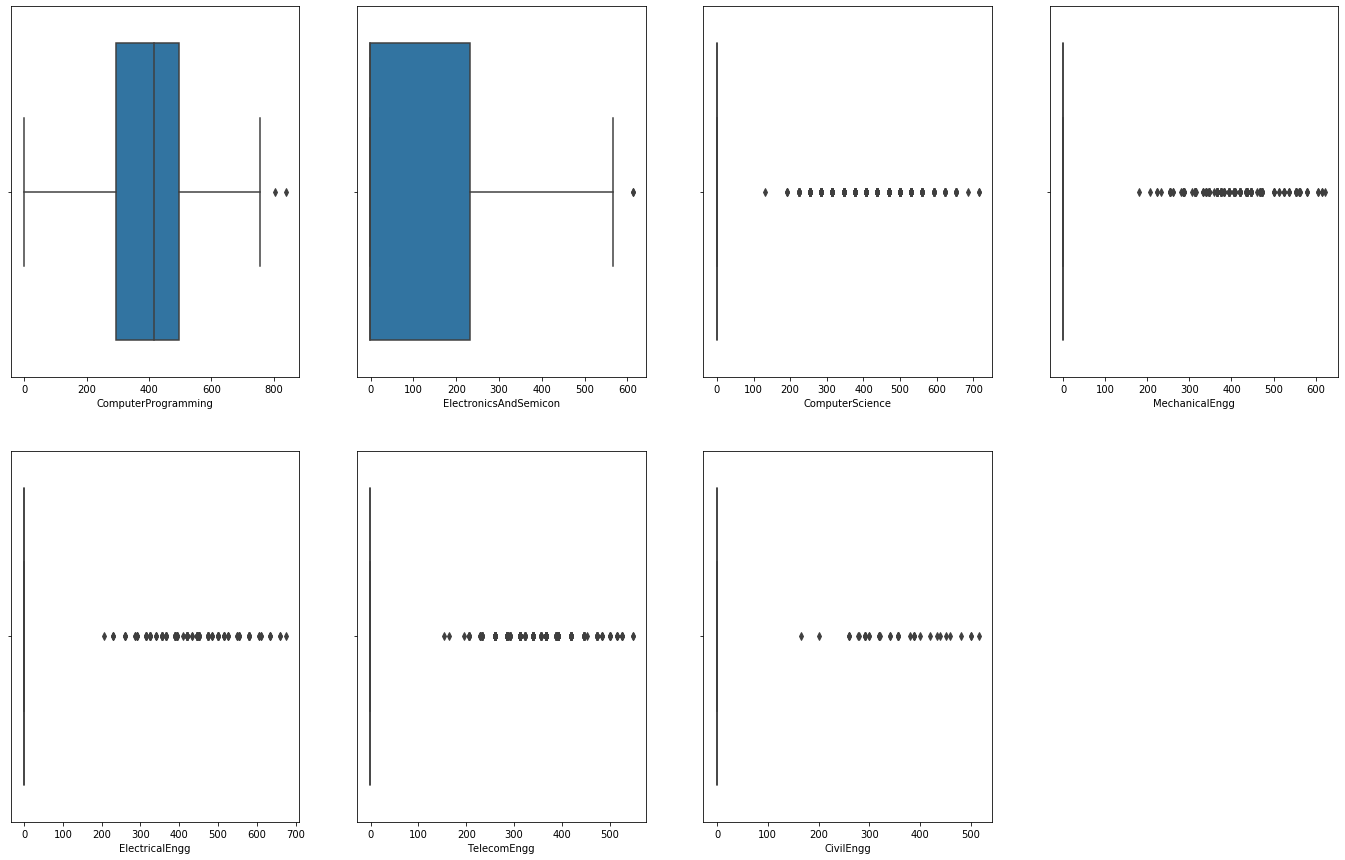

In [24]:
plt.figure(figsize=(30,15))
plt.subplot(251)
sns.boxplot(df['ComputerProgramming'])
plt.subplot(252)
sns.boxplot(df['ElectronicsAndSemicon'])
plt.subplot(253)
sns.boxplot(df['ComputerScience'])
plt.subplot(254)
sns.boxplot(df['MechanicalEngg'])
plt.subplot(256)
sns.boxplot(df['ElectricalEngg'])
plt.subplot(257)
sns.boxplot(df['TelecomEngg'])
plt.subplot(258)
sns.boxplot(df['CivilEngg'])
plt.show()

Distribution of AMCAT scores of Hard skills

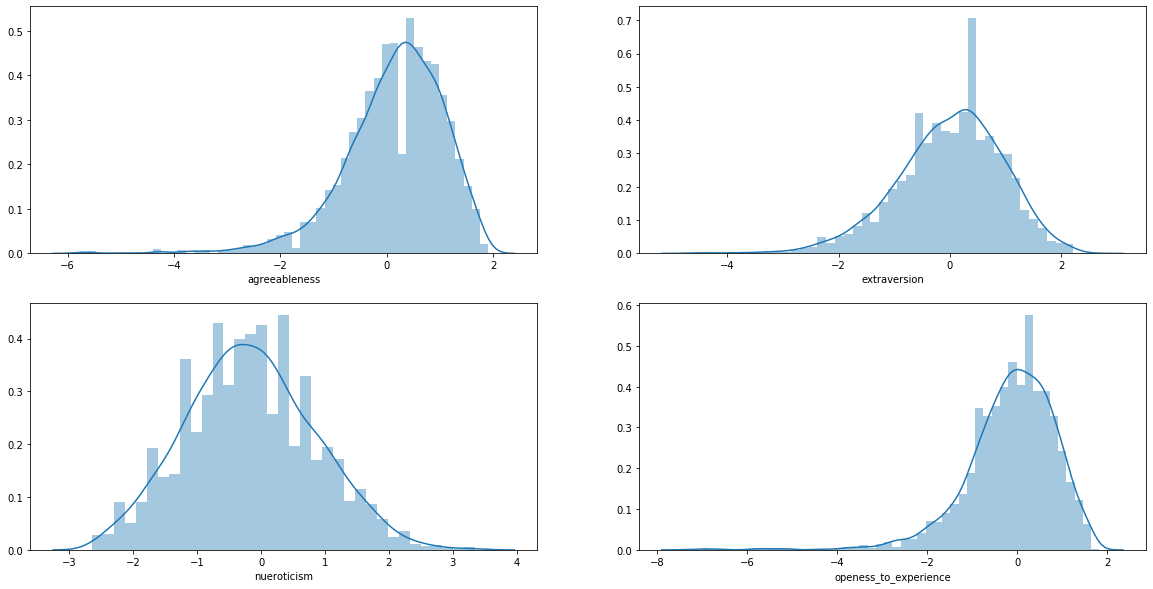

In [25]:
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.distplot(df['agreeableness'])
plt.subplot(222)
sns.distplot(df['extraversion'])
plt.subplot(223)
sns.distplot(df['nueroticism'])
plt.subplot(224)
sns.distplot(df['openess_to_experience'])
plt.show()

Distributions of AMCAT score of personality skills

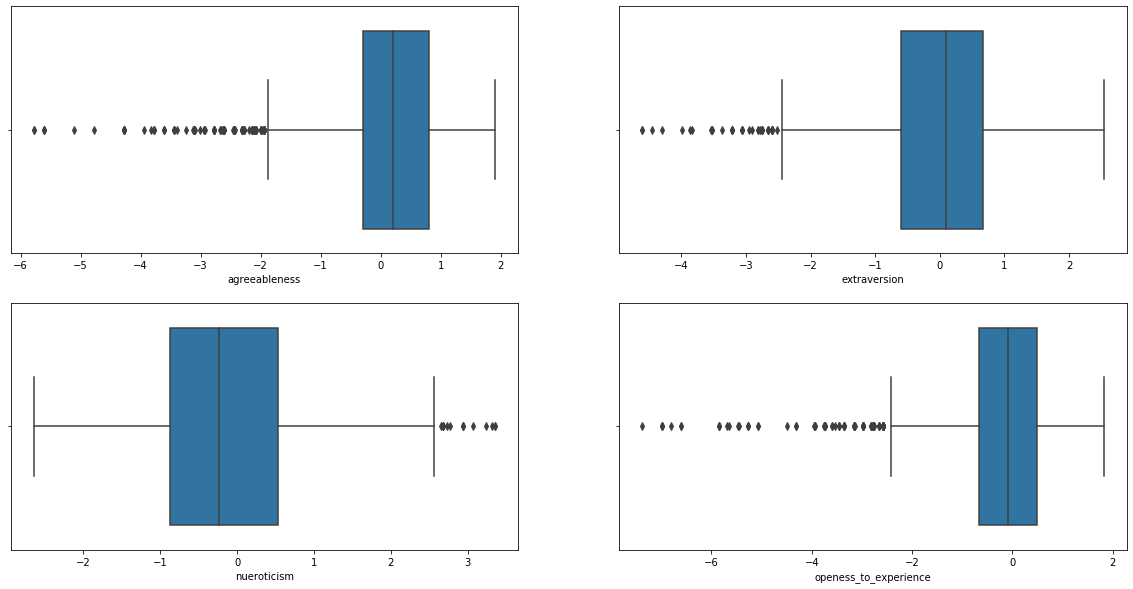

In [26]:
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.boxplot(df['agreeableness'])
plt.subplot(222)
sns.boxplot(df['extraversion'])
plt.subplot(223)
sns.boxplot(df['nueroticism'])
plt.subplot(224)
sns.boxplot(df['openess_to_experience'])
plt.show()

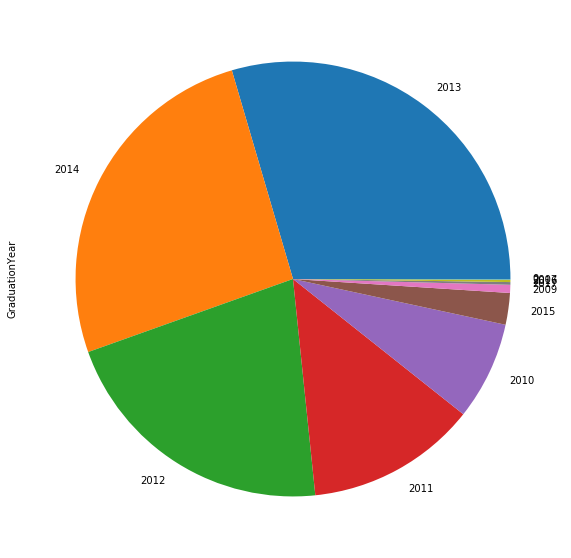

In [27]:
gy = df['GraduationYear'].value_counts()
gy.plot(kind="pie", figsize=(20,10))

## Observations from Univariate Analysis
* There are more Male employees than Female employees
* Most of the employees are from Tier 2 college
* Most of the employees are B.E/B.Tech graduates
* Maximum employees are from Uttar Pradesh
* Very few employees have salary > 1000000
* Most of the employees have College GPA between 60-80
* 10Percentage column is right skewed
* 12Percentage is normally distributed
* AMCAT scores of soft skills are normally distributed
* AMCAT scores of hard skills are log normally distributed
* AMCAT scores of personality test are right skewed
* Most of the employees are graduated between 2010 and 2014

## Bivariate Analysis

[Text(0, 0, '420000'),
 Text(0, 0, '500000'),
 Text(0, 0, '325000'),
 Text(0, 0, '1100000'),
 Text(0, 0, '200000'),
 Text(0, 0, '300000'),
 Text(0, 0, '300000'),
 Text(0, 0, '400000'),
 Text(0, 0, '600000'),
 Text(0, 0, '230000'),
 Text(0, 0, '600000')]

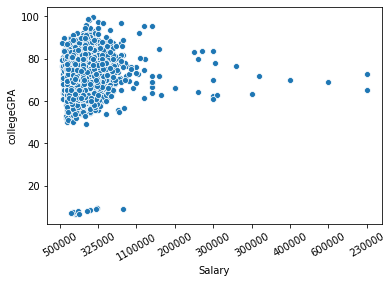

In [28]:
p=sns.scatterplot(x=df['Salary'], y=df['collegeGPA'])
p.set_xticklabels(labels=df['Salary'],rotation=30)

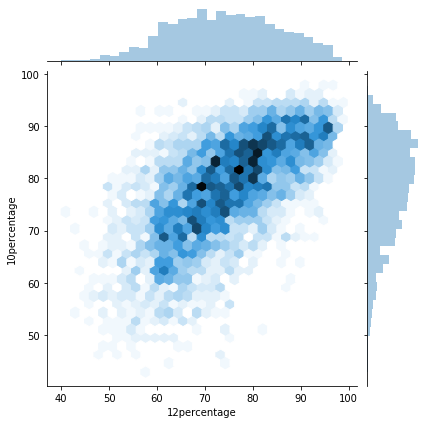

In [29]:
sns.jointplot(x=df['12percentage'],y=df['10percentage'],kind='hex',data=df)

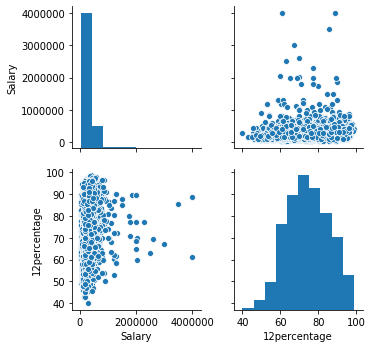

In [30]:
sns.pairplot(df,vars=['Salary','12percentage'])

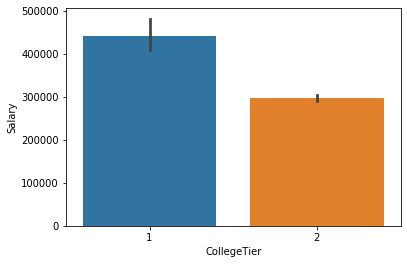

In [31]:
sns.barplot(df['CollegeTier'],df['Salary'])

[Text(0, 0, 'computer engineering'),
 Text(0, 0, 'electronics and communication engineering'),
 Text(0, 0, 'information technology'),
 Text(0, 0, 'computer engineering'),
 Text(0, 0, 'electronics and communication engineering'),
 Text(0, 0, 'electronics and communication engineering'),
 Text(0, 0, 'computer science & engineering'),
 Text(0, 0, 'mechanical engineering'),
 Text(0, 0, 'electronics and electrical engineering'),
 Text(0, 0, 'electronics and communication engineering'),
 Text(0, 0, 'computer engineering'),
 Text(0, 0, 'information technology'),
 Text(0, 0, 'electronics & telecommunications'),
 Text(0, 0, 'electronics and communication engineering'),
 Text(0, 0, 'instrumentation and control engineering'),
 Text(0, 0, 'information technology'),
 Text(0, 0, 'electronics and communication engineering'),
 Text(0, 0, 'computer application'),
 Text(0, 0, 'computer science & engineering'),
 Text(0, 0, 'computer engineering'),
 Text(0, 0, 'computer engineering'),
 Text(0, 0, 'informa

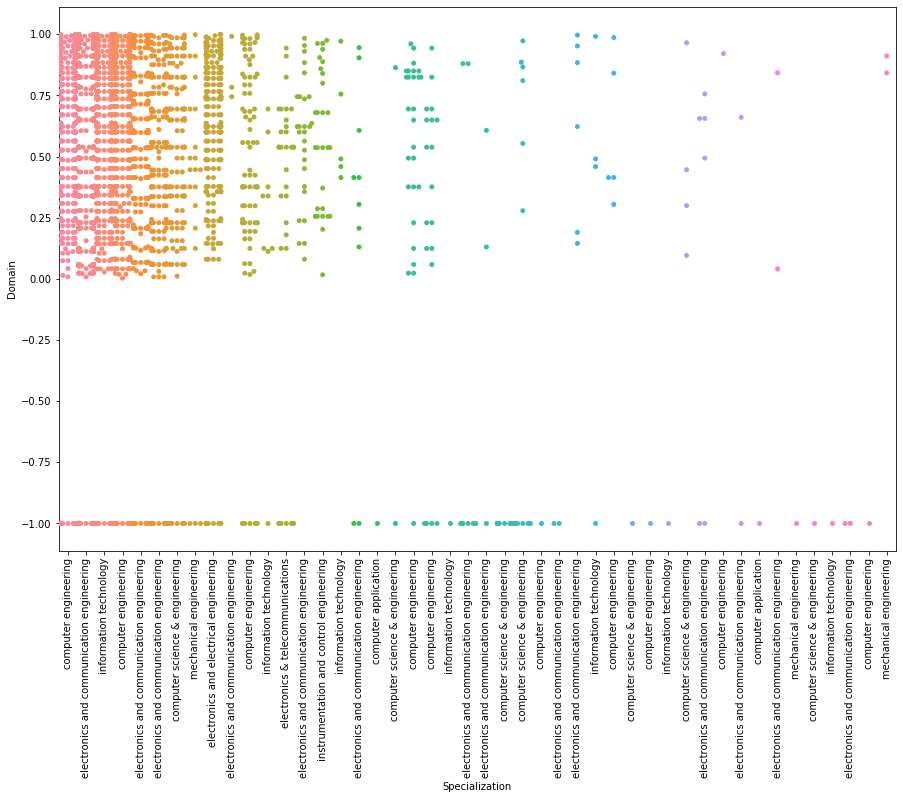

In [32]:
plt.figure(figsize=(15,10))
sd=sns.swarmplot(df['Specialization'],df['Domain'])
sd.set_xticklabels(df['Specialization'],rotation=90)

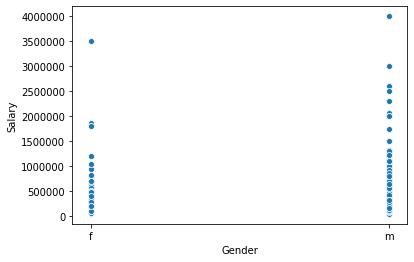

In [33]:
sns.scatterplot(df['Gender'],df['Salary'])

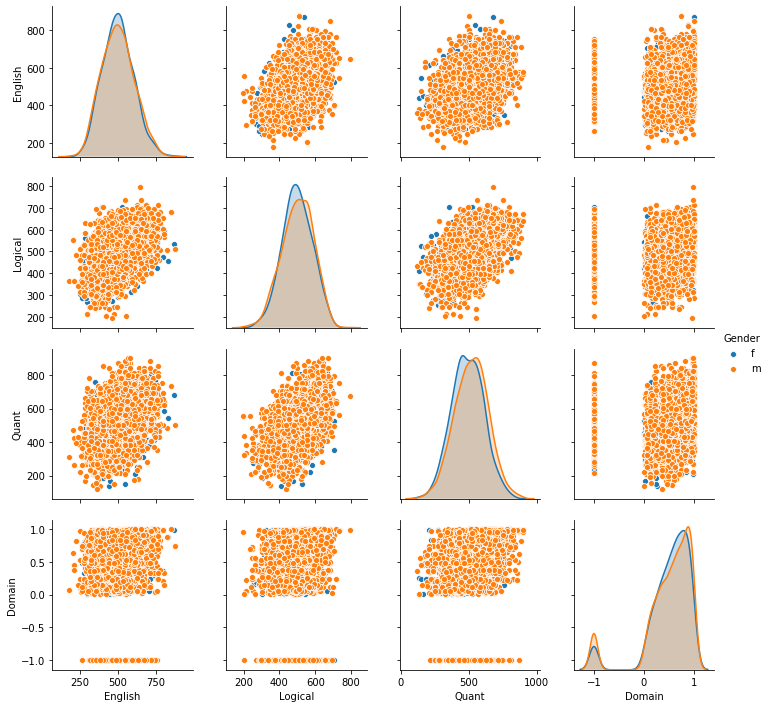

In [34]:
cols=df.columns[22:26].tolist() + ['Gender']
sns.pairplot(df[cols], hue ="Gender")

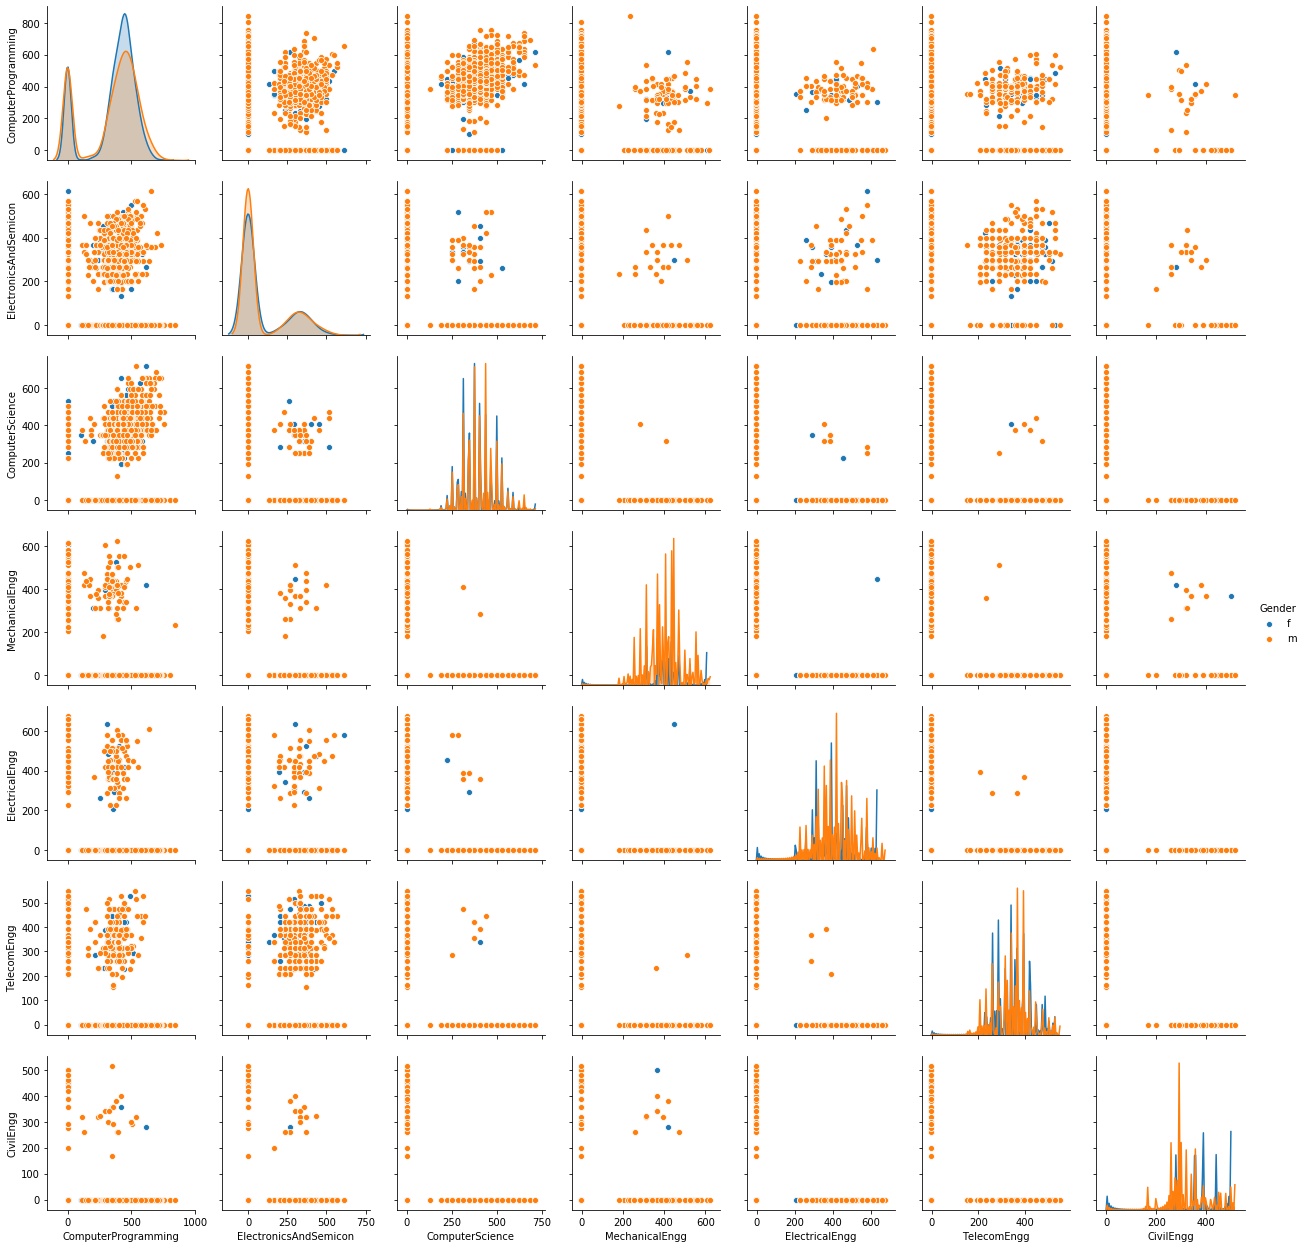

In [35]:
cols3=df.columns[26:33].tolist() + ['Gender']
sns.pairplot(df[cols3], hue ="Gender")

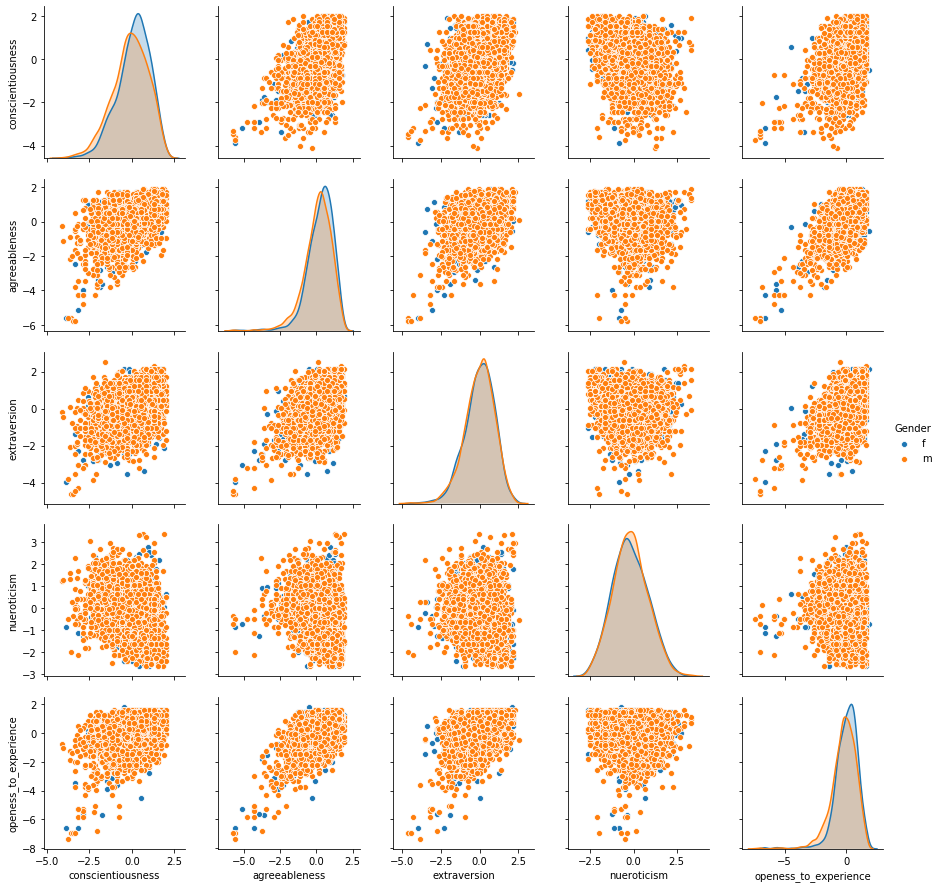

In [36]:
cols2=df.columns[33:38].tolist() + ['Gender']
sns.pairplot(df[cols2], hue ="Gender")

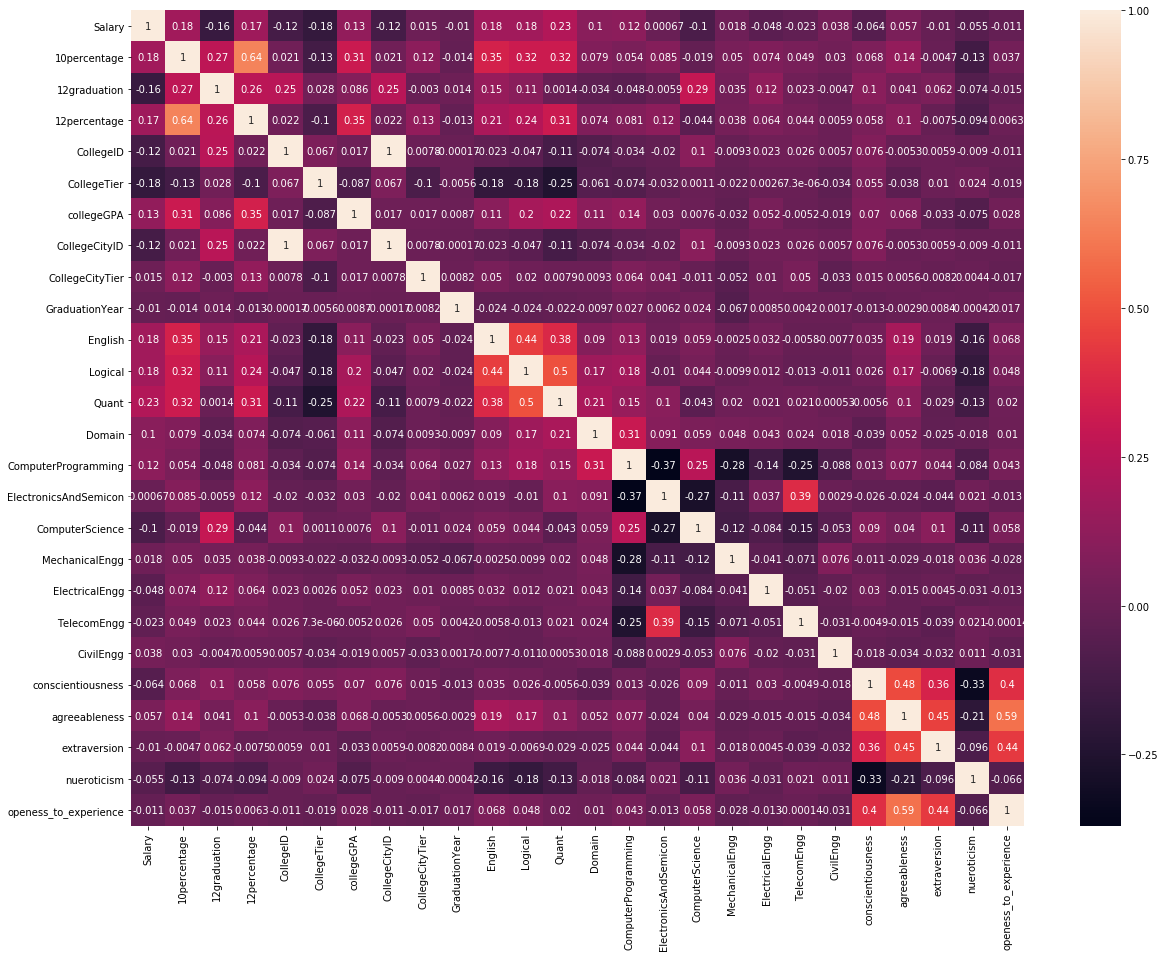

In [37]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Observations from bivariate analysis
* Salary does not depend on GPA, 10th percentage and 12th percentage
* 12th percentage depends on 10th percentage
* Employees from Tier 1 college have more salary compared to Tier 2
* Salary does not depend on Gender
* College GPA does not depend on College Tier
* GraduationYear has no relation with any other column except DOJ and DOL
* College ID and College City ID are completely correlated so drop one of them
* Female employees have better soft skills than male employees
* Male employees have better soft skills than female employees

## Research Questions
* Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.
* Is there a relationship between gender and specialisation? (i.e. Does the preference of Specialisation depend on the Gender?)

### Test of claim by Times of India article 

In [38]:
job_role =['programmer analyst','software engineer','hardware engineer','associate engineer']
df_cs = df[df['Specialization'] =='computer science & engineering']

In [39]:
df1 = df_cs[df_cs['Designation'].isin(job_role).values]
df1.head()

,Unnamed: 0,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
24,train,335000,2014-06-01,2015-06-01 00:00:00,programmer analyst,Hyderabad,m,1993-06-28,88.0,state board,...,346,-1,-1,-1,-1,0.4155,0.8027,0.1357,-0.99500,-0.6692
31,train,340000,2014-08-01,2015-04-01 00:00:00,software engineer,Bangalore,m,1992-10-23,77.2,state board,...,407,-1,-1,-1,-1,-0.0154,1.2114,1.0859,-1.50210,0.2889
48,train,390000,2013-09-01,present,software engineer,Bangalore,m,1991-02-28,86.6,cbse,...,346,-1,-1,-1,-1,-2.5039,0.0328,0.3817,0.26793,0.5024
52,train,400000,2015-04-01,present,software engineer,Navi Mumbai,m,1992-03-09,85.2,icse,...,-1,-1,-1,-1,-1,1.1336,0.3789,1.0859,0.65300,0.2889
55,train,250000,2014-08-01,present,software engineer,Mangalore,m,1992-02-13,90.8,state board,...,376,-1,-1,-1,-1,-0.3027,0.7119,-0.2974,1.16010,-0.4776


In [40]:
population_mean= df_cs['Salary'].mean()
population_std = df_cs['Salary'].std()

In [41]:
df_cs_sample = df_cs.head(30)
sample_mean = df_cs_sample.Salary.mean()
sample_size = 30

In [42]:
def z_score(sample_size, sample_mean, pop_mean, pop_std):
    numerator = sample_mean - pop_mean
    denomenator = pop_std / sample_size**0.5
    return numerator / denomenator

In [43]:
Zscore = z_score(sample_size, sample_mean, population_mean, population_std)

In [44]:
z1 = (250000-population_mean)/population_std
z2 = (300000-population_mean)/population_std

In [45]:
if Zscore < z2 and Zscore > z1:
    print('We failed to reject null hypothesis')
else:
    print('We reject null hypothesis')

We reject null hypothesis


So the claim of the article by Times of India is not correct

### Check relationship between Gender and Specialization

In [46]:
pd.crosstab(index=df['Specialization'],columns=df['Gender'])

Gender,f,m
Specialization,,
aeronautical engineering,1,2
applied electronics and instrumentation,2,7
automobile/automotive engineering,0,5
biomedical engineering,2,0
biotechnology,9,6
ceramic engineering,0,1
chemical engineering,1,8
civil engineering,6,23
computer and communication engineering,0,1


In [47]:
ct=pd.crosstab(df['Specialization'],df['Gender'])
chi2_contingency(ct)

(104.46891913608454,
 1.2453868176977011e-06,
 45,
 array([[7.18109055e-01, 2.28189095e+00],
        [2.15432716e+00, 6.84567284e+00],
        [1.19684842e+00, 3.80315158e+00],
        [4.78739370e-01, 1.52126063e+00],
        [3.59054527e+00, 1.14094547e+01],
        [2.39369685e-01, 7.60630315e-01],
        [2.15432716e+00, 6.84567284e+00],
        [6.94172086e+00, 2.20582791e+01],
        [2.39369685e-01, 7.60630315e-01],
        [5.84062031e+01, 1.85593797e+02],
        [1.43621811e+02, 4.56378189e+02],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.78091046e+02, 5.65908954e+02],
        [1.43621811e+00, 4.56378189e+00],
        [2.39369685e-01, 7.60630315e-01],
        [4.78739370e-01, 1.52126063e+00],
        [1.96283142e+01, 6.23716858e+01],
        [2.39369685e-01, 7.60630315e-01],
        [7.65982991e+00, 2.43401701e+01],
        [2.89637319e+01, 9.20362681e+01],
        [2.10645323e+02, 6.69354677e+02],
        [7.18109055e-01, 

In [48]:
chi2_test_stat = chi2_contingency(ct)[0]
pval = chi2_contingency(ct)[1]
df2 = chi2_contingency(ct)[2]

In [49]:
confidence_level =0.90
alpha = 1 - confidence_level
chi2_critical = chi2.ppf(1-alpha,df2)
chi2_critical

57.50530474499599

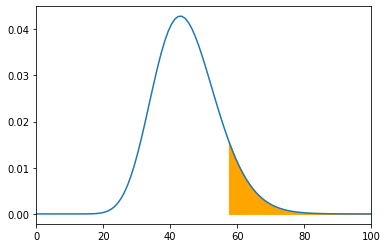

In [50]:
#Plotting the chi2 distribution
x_min = 0
x_max = 100

#plotting the graph and setting the limits
x = np.linspace(x_min,x_max,100)
y = chi2.pdf(x,df2)
plt.xlim(x_min,x_max)
plt.plot(x,y)

#Setting chi critical value
chi_critical_right = chi2_critical

#Shading the rejection region
x1 = np.linspace(chi_critical_right,x_max,100)
y1 = chi2.pdf(x1,df2)
plt.fill_between(x1,y1,color='orange')

In [51]:
#conclusion with chi^2 test
if(chi2_test_stat>chi2_critical):
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

Reject null hypothesis


In [52]:
#Conclusion with p-test
if (pval<alpha):
    print("Reject null hypothesis")
else:
    print("Failed to reject null hypothesis")

Reject null hypothesis


So the preference of Specialisation depends on the Gender.

## Conclusion
* Male employees have higher chances of employment than Female employees
* Tier 1 college candidates are more likely to get a higher salary than tier 2 college candidate
* B.E/B.Tech graduates are more likely to get the employment
* The preference of Specialisation depends on the Gender
* Salary of candidate do not depend on Gender
* Salary does not depend on GPA, 10th percentage and 12th percentage